# **MACHINE LEARNING MINI PROJECT(Advance)**

AUTHOR


STUDENT NAME : MOKSHITH KUMMARI

STUDENT ID : 210650383

# 2) PROBLEM FORMULATION
Using Support Vector Machines  we got an accuracy of 63.
The Aim here is to improve accuracy using different Machine learning models and also a deep learning model(Mel-Frequency cepstral coefficients). And try to find the best parameters for the models.


#7)DATASET

In [88]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')# Drive mount

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
path = '/content/drive/MyDrive/data1/dataset/sample/set'
os.listdir(path) #Path of the dataset

['S120_whistle_2_Potter.wav',
 'S120_hum_2_StarWars.wav',
 'S120_hum_2_Potter.wav',
 'S120_whistle_2_StarWars.wav',
 'S121_hum_1_Potter.wav',
 'S121_hum_2_Potter.wav',
 'S121_hum_3_StarWars.wav',
 'S121_hum_4_StarWars.wav',
 'S122_hum_2_StarWars.wav',
 'S122_hum_2_Potter.wav',
 'S123_hum_2_Starwars.wav',
 'S122_whistle_2_Potter.wav',
 'S122_whistle_2_StarWars.wav',
 'S123_whistle_2_Starwars.wav',
 'S124_Hum_2_Potter.wav',
 'S124_Hum_2_StarWars.wav',
 'S124_Whistle_2_Potter.wav',
 'S124_Whistle_2_StarWars.wav',
 'S125_hum_2_Potter.wav',
 'S125_hum_2_StarWars.wav',
 'S125_whistle_2_Potter.wav',
 'S125_whistle_2_StarWars.wav',
 'S126_hum_2_Potter.wav',
 'S126_hum_2_StarWars.wav',
 'S126_whistle_2_Potter.wav',
 'S126_whistle_2_StarWars.wav',
 'S127_hum_1_Potter.wav',
 'S127_hum_2_Potter.wav',
 'S128_hum_1_Potter.wav',
 'S127_hum_4_StarWars.wav',
 'S128_hum_3_StarWars.wav',
 'S128_hum_2_Potter.wav',
 'S127_hum_3_StarWars.wav',
 'S128_hum_4_StarWars.wav',
 'S129_hum_2_StarWars.wav',
 'S129_w

In [90]:
sample_path = '/content/drive/MyDrive/data1/dataset/sample/set/*.wav'
files = glob.glob(sample_path)
len(files) # Length of the files

810

In [91]:
for file in files:
  print(file.split('/')[-1])

S120_whistle_2_Potter.wav
S120_hum_2_StarWars.wav
S120_hum_2_Potter.wav
S120_whistle_2_StarWars.wav
S121_hum_1_Potter.wav
S121_hum_2_Potter.wav
S121_hum_3_StarWars.wav
S121_hum_4_StarWars.wav
S122_hum_2_StarWars.wav
S122_hum_2_Potter.wav
S123_hum_2_Starwars.wav
S122_whistle_2_Potter.wav
S122_whistle_2_StarWars.wav
S123_whistle_2_Starwars.wav
S124_Hum_2_Potter.wav
S124_Hum_2_StarWars.wav
S124_Whistle_2_Potter.wav
S124_Whistle_2_StarWars.wav
S125_hum_2_Potter.wav
S125_hum_2_StarWars.wav
S125_whistle_2_Potter.wav
S125_whistle_2_StarWars.wav
S126_hum_2_Potter.wav
S126_hum_2_StarWars.wav
S126_whistle_2_Potter.wav
S126_whistle_2_StarWars.wav
S127_hum_1_Potter.wav
S127_hum_2_Potter.wav
S128_hum_1_Potter.wav
S127_hum_4_StarWars.wav
S128_hum_3_StarWars.wav
S128_hum_2_Potter.wav
S127_hum_3_StarWars.wav
S128_hum_4_StarWars.wav
S129_hum_2_StarWars.wav
S129_whistle_2_Potter.wav
S129_hum_2_Potter.wav
S129_whistle_2_StarWars.wav
S12_hum_2_Potter .wav
S12_hum_3_StarWars.wav
S12_hum_4_Potter .wav
S12_h

In [92]:
print('The full path to the first audio file is: ', files[0]) #Displaying the path of first audio file
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1]) #Name of the first audio file
print('    The participant ID is: ', files[0].split('/')[-1].split('_')[0]) #Participant ID of the first audio file
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1]) # Interpretation of the first audio file
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2]) #Interpretation number of the first audio file
print('    The song is: ', files[0].split('/')[-1].split('_')[3]) #The song label of the first audio file

The full path to the first audio file is:  /content/drive/MyDrive/data1/dataset/sample/set/S120_whistle_2_Potter.wav


The name of the first audio file is:  S120_whistle_2_Potter.wav
    The participant ID is:  S120
    The type of interpretation is:  whistle
    The interpretation number is:  2
    The song is:  Potter.wav


In [93]:
MLENDHW_table = [] #Making a DataFrame from the files

for file in files:
  try:
   file_name = file.split('/')[-1]
   participant_ID = file.split('/')[-1].split('_')[0]
   interpretation_type = file.split('/')[-1].split('_')[1]
   interpretation_number = file.split('/')[-1].split('_')[2]
   song = file.split('/')[-1].split('_')[3].split('.')[0]
   if song == "Potter" or  "potter" or "StarWars" or "starwars" or"StarWar" or "imperial":
       MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
  except:
   continue
MLENDHW_table
len(MLENDHW_table)

810

In [94]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df #Displaying the dataframe

,participant,interpretation,number,song
file_id,,,,
S120_whistle_2_Potter.wav,S120,whistle,2,Potter
S120_hum_2_StarWars.wav,S120,hum,2,StarWars
S120_hum_2_Potter.wav,S120,hum,2,Potter
S120_whistle_2_StarWars.wav,S120,whistle,2,StarWars
S121_hum_1_Potter.wav,S121,hum,1,Potter
...,...,...,...,...
S180_whistle_1_star.wav,S180,whistle,1,star
S180_whistle_2_star.wav,S180,whistle,2,star
S150_hum_1_imperial.wav,S150,hum,1,imperial


In [95]:
MLENDHW_df['song'].value_counts() ## Lots of song labels in the given data. Have to change labels to just Potter and StarWars

Potter           340
StarWars         319
[Potter]          34
[StarWars]        29
Starwars          21
potter            13
starwars           7
[potter]           4
Potter             4
Imperial           4
(starwars)         2
[ Star Wars ]      2
[Starwars]         2
[Potter]           2
(potter)           2
star               2
2                  2
[STARWARS]         2
Star wars          2
1                  2
Harry              2
starwar            2
StarsWars          2
[StarWars]         2
star wars          2
imperial           1
harry potter       1
StartWars          1
Potterwav          1
[StatWars]         1
Name: song, dtype: int64

Replacing the incorrect format of label names with the correct format of label name. 

In [96]:
Pre_Data= MLENDHW_df.replace({'song' : { "[Potter]" : "Potter" ,"potter" :"Potter", "[potter]":"Potter","Harry":"Potter","[Potter]":"Potter","(potter)":"Potter","Potterwav":"Potter","harry potter":"Potter","Potter ":"Potter","[Potter] ":"Potter",'Starwars':'StarWars','[StarWars]':'StarWars','Imperial':'StarWars','March':'StarWars','[StarWars] ':'StarWars','star':'StarWars','(starwars)':'StarWars','imperial':'StarWars','starwars':'StarWars','[STARWARS]':'StarWars','StartWars':'StarWars','[ Star Wars ]':'StarWars','[StatWars]':'StarWars','1':'StarWars','2':'StarWars','[Starwars]':'StarWars','starwar':'StarWars','StarsWars':'StarWars','Star wars':'StarWars','star wars':'StarWars' }})

After replacing the labels we can only find Potter and StarWars as song labels.

In [97]:
uniqueValues = Pre_Data['song'].unique()
uniqueValues

array(['Potter', 'StarWars'], dtype=object)

# 4) TRANSFORMATION STAGE

Sampling frequency of a single audio file.

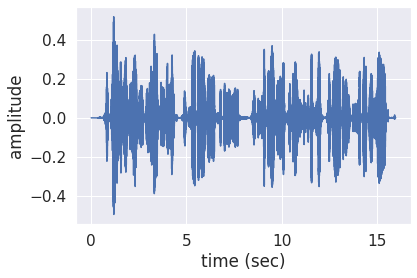

In [98]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n])) #Displaying the sample frequency

Details of the above audio file

In [99]:
Pre_Data.loc[files[n].split('/')[-1]] #Details of S120 audio file

participant          S120
interpretation    whistle
number                  2
song               Potter
Name: S120_whistle_2_Potter.wav, dtype: object

Lets check the samples of audio signal.

In [100]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples') #Displays the samples of audio signal

This audio signal has 766976 samples


Lets Normalize the data.

In [101]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [102]:
def getPitch(x,fs,winLen=0.02): # Feature Pitch Calculation
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Feature Extraction from the given audio dataset.

In [103]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']=='Potter'


    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)#Features Power, Pitch mean, Pitch standard deviation, Fraction of voiced region calculation
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

#3) MACHINE LEARNING PIPELINE
Identifying the input and output of the data from the audio set and labels file.

In [104]:
X,y = getXy(files, labels_file=Pre_Data, scale_audio=True, onlySingleDigit=True)

100%|██████████| 810/810 [43:19<00:00,  3.21s/it]


Removing Nan values from the dataset.

In [105]:
# If nan sample, remove them
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


Displaying the shape of X and y

In [106]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)

The shape of X is (810, 4)
The shape of y is (810,)


As you can see, we have 810 items consisting of 4 features (stored in X) and one binary label (stored in y). Is our dataset balanced? Let's have a look:

In [107]:
print(' The number of Potter recordings is ', np.count_nonzero(y))
print(' The number of StarWars recordings is ', y.size - np.count_nonzero(y))

 The number of Potter recordings is  403
 The number of StarWars recordings is  407


In [109]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (810, 4)
The shape of y is (810,)
The labels vector is [ True False  True False  True  True False False False  True False  True
 False False  True False  True False  True False  True False  True False
  True False  True  True  True False False  True False False False  True
  True False  True False  True False  True False  True False False  True
  True False  True  True False  True False False False  True  True False
  True  True False  True False False  True  True False False False False
 False  True  True False  True False False False  True  True  True  True
  True  True False False False False False  True  True False  True  True
  True False False  True False  True  True False False  True  True False
  True  True False False  True False False  True  True  True  True  True
 False False  True False  True  True False  True False  True False  True
 False False  True False False  True False  True False  True False  True
  True  True False  True False  True  True False  T

In [110]:
print(' The number of Potter recordings is ', np.count_nonzero(y))
print(' The number of StarWars recordings is ', y.size - np.count_nonzero(y))

 The number of Potter recordings is  403
 The number of StarWars recordings is  407


#5) Modelling

Fitting different Machine learning models to predict the type of song(StarWars or Potter) and comparing accuracies.

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((567, 4), (243, 4), (567,), (243,))

Now, we will implement different classifiers and compare the accuracies of different models.

#6) METHODOLOGY

Here we will find the accuracies of different classifiers and compare which model is the best among them.

In [112]:
mean = X_train.mean(0)

sd =  X_train.std(0)


from sklearn.naive_bayes import GaussianNB #Importing different classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

classification_models = [
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         KNeighborsClassifier(),  
                         RandomForestClassifier(),
                         SVC(kernel='rbf'),
                         AdaBoostClassifier(),
                         QuadraticDiscriminantAnalysis()
]
scores = []
for model in classification_models:# Loop for classification models
  model.fit(X_train,y_train)
  score=model.score(X_val,y_val)
  model_name=type(model).__name__
  if model_name=='SVC' and model.kernel=='rbf': model_name='RBF kernel' 
  scores.append((model_name,(f'{100*score:.2f}%')))
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by = 'Accuracy Score',axis = 0, ascending = False)

,Classifier,Accuracy Score
5,AdaBoostClassifier,63.79%
1,DecisionTreeClassifier,62.14%
2,KNeighborsClassifier,61.73%
3,RandomForestClassifier,61.73%
4,RBF kernel,60.49%
0,GaussianNB,51.44%
6,QuadraticDiscriminantAnalysis,49.38%


Here, We can see that the best model is AdaBoost Classifier which returns a accuracy of 63.79.

We can check the accuracy after cross-validating the dataset.

#8) RESULT

Cross validating the Dataset and then comparing the accuracies of the classifiers and also implementing Mel-frequency cepstrum model to check the accuracy.

In [113]:
from sklearn.model_selection import cross_validate

list1 = []
list2 = []
for model in classification_models:
  cv_results = cross_validate(model, X, y, cv=10)
  model_name=type(model).__name__
  print(model_name)
  a = np.average(cv_results['test_score'])
  list1.append(model_name)
  list2.append(a)
  print(a)
df_crossvalidate = pd.DataFrame(data = list2,index = list1,columns=['Accuracy'] )
a = df_crossvalidate.sort_values(by = 'Accuracy',axis = 0, ascending = False)
display(a)

GaussianNB
0.5098765432098765
DecisionTreeClassifier
0.6074074074074074
KNeighborsClassifier
0.6530864197530863
RandomForestClassifier
0.6407407407407406
SVC
0.5691358024691358
AdaBoostClassifier
0.645679012345679
QuadraticDiscriminantAnalysis
0.5037037037037038


,Accuracy
KNeighborsClassifier,0.653086
AdaBoostClassifier,0.645679
RandomForestClassifier,0.640741
DecisionTreeClassifier,0.607407
SVC,0.569136
GaussianNB,0.509877
QuadraticDiscriminantAnalysis,0.503704


We can see that after cross-validating the accuaracies of Knn, AdaBoost, RandomForest, DecisionTree classifiers has increased.

GRIDSEARCH CV

Finding the best parameters for SVM model

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sn

# Defining the C value, Gamma and kernel
param_grid = { 'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11],'kernel': ['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

# Printing the best parameter value
print("Best Parameter Value: \n\n", grid.best_params_)
grid_predictions=grid.predict(X_val)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=

Here, as we can see c=0.7 and gamma=0.9 is the best parameter

Below we create a confusion matrix for Svm model.

              precision    recall  f1-score   support

       False       0.68      0.47      0.56       134
        True       0.53      0.73      0.62       109

    accuracy                           0.59       243
   macro avg       0.61      0.60      0.59       243
weighted avg       0.62      0.59      0.58       243



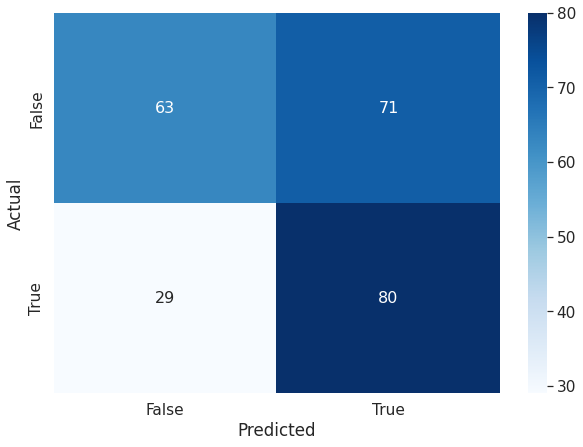

In [115]:
# Printing the confusion matrix
con_mat = confusion_matrix(y_val,grid_predictions)

# Printing the Classification Report
print(classification_report(y_val,grid_predictions))
df_cm = pd.DataFrame(con_mat, columns=np.unique(y_val), index = np.unique(y_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Now we can create a widget tabbar and see whats the best C value to get the best accuracy. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.6243386243386243
Validation  Accuracy 0.51440329218107
Confusion matrix for Training:
 [[ 76 197]
 [ 16 278]]

Confusion matrix for Validation:
 [[ 27 107]
 [ 11  98]]

Normalised confusion matrix for Training:
 [[0.27838828 0.72161172]
 [0.05442177 0.94557823]]

Normalised confusion matrix for Validation :
 [[0.20149254 0.79850746]
 [0.10091743 0.89908257]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.6684303350970018
Validation  Accuracy 0.5390946502057613
Confusion matrix for Training:
 [[110 163]
 [ 25 269]]

Confusion matrix for Validation:
 [[40 94]
 [18 91]]

Normalised confusion matrix for Training:
 [[0.4029304  0.5970696 ]
 [0.08503401 0.91496599]]

Normalised confusion matrix for Validation :
 [[0.29850746 0.70149254]
 [0.16513761 0.83486239]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7283950617283951
Validation  Accuracy 0.5720164609053497
Confusion matrix for Training:
 [[150 123]
 [ 31 263]]

Confusion matrix for Validation:
 [[52 82]
 [22 87]]

Normalised confusion matrix for Training:
 [[0.54945055 0.45054945]
 [0.10544218 0.89455782]]

Normalised confusion matrix for Validation :
 [[0.3880597  0.6119403 ]
 [0.20183486 0.79816514]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7566137566137566
Validation  Accuracy 0.588477366255144
Confusion matrix for Training:
 [[170 103]
 [ 35 259]]

Confusion matrix for Validation:
 [[59 75]
 [25 84]]

Normalised confusion matrix for Training:
 [[0.62271062 0.37728938]
 [0.11904762 0.88095238]]

Normalised confusion matrix for Validation :
 [[0.44029851 0.55970149]
 [0.2293578  0.7706422 ]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7795414462081128
Validation  Accuracy 0.6008230452674898
Confusion matrix for Training:
 [[189  84]
 [ 41 253]]

Confusion matrix for Validation:
 [[67 67]
 [30 79]]

Normalised confusion matrix for Training:
 [[0.69230769 0.30769231]
 [0.13945578 0.86054422]]

Normalised confusion matrix for Validation :
 [[0.5        0.5       ]
 [0.27522936 0.72477064]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.7848324514991182
Validation  Accuracy 0.5967078189300411
Confusion matrix for Training:
 [[194  79]
 [ 43 251]]

Confusion matrix for Validation:
 [[68 66]
 [32 77]]

Normalised confusion matrix for Training:
 [[0.71062271 0.28937729]
 [0.1462585  0.8537415 ]]

Normalised confusion matrix for Validation :
 [[0.50746269 0.49253731]
 [0.29357798 0.70642202]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.798941798941799
Validation  Accuracy 0.5967078189300411
Confusion matrix for Training:
 [[203  70]
 [ 44 250]]

Confusion matrix for Validation:
 [[68 66]
 [32 77]]

Normalised confusion matrix for Training:
 [[0.74358974 0.25641026]
 [0.14965986 0.85034014]]

Normalised confusion matrix for Validation :
 [[0.50746269 0.49253731]
 [0.29357798 0.70642202]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8059964726631393
Validation  Accuracy 0.6008230452674898
Confusion matrix for Training:
 [[205  68]
 [ 42 252]]

Confusion matrix for Validation:
 [[70 64]
 [33 76]]

Normalised confusion matrix for Training:
 [[0.75091575 0.24908425]
 [0.14285714 0.85714286]]

Normalised confusion matrix for Validation :
 [[0.52238806 0.47761194]
 [0.30275229 0.69724771]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8059964726631393
Validation  Accuracy 0.6008230452674898
Confusion matrix for Training:
 [[204  69]
 [ 41 253]]

Confusion matrix for Validation:
 [[72 62]
 [35 74]]

Normalised confusion matrix for Training:
 [[0.74725275 0.25274725]
 [0.13945578 0.86054422]]

Normalised confusion matrix for Validation :
 [[0.53731343 0.46268657]
 [0.32110092 0.67889908]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8077601410934744
Validation  Accuracy 0.5967078189300411
Confusion matrix for Training:
 [[205  68]
 [ 41 253]]

Confusion matrix for Validation:
 [[72 62]
 [36 73]]

Normalised confusion matrix for Training:
 [[0.75091575 0.24908425]
 [0.13945578 0.86054422]]

Normalised confusion matrix for Validation :
 [[0.53731343 0.46268657]
 [0.33027523 0.66972477]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8271604938271605
Validation  Accuracy 0.6049382716049383
Confusion matrix for Training:
 [[211  62]
 [ 36 258]]

Confusion matrix for Validation:
 [[74 60]
 [36 73]]

Normalised confusion matrix for Training:
 [[0.77289377 0.22710623]
 [0.12244898 0.87755102]]

Normalised confusion matrix for Validation :
 [[0.55223881 0.44776119]
 [0.33027523 0.66972477]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8395061728395061
Validation  Accuracy 0.6090534979423868
Confusion matrix for Training:
 [[216  57]
 [ 34 260]]

Confusion matrix for Validation:
 [[72 62]
 [33 76]]

Normalised confusion matrix for Training:
 [[0.79120879 0.20879121]
 [0.11564626 0.88435374]]

Normalised confusion matrix for Validation :
 [[0.53731343 0.46268657]
 [0.30275229 0.69724771]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8624338624338624
Validation  Accuracy 0.6090534979423868
Confusion matrix for Training:
 [[223  50]
 [ 28 266]]

Confusion matrix for Validation:
 [[73 61]
 [34 75]]

Normalised confusion matrix for Training:
 [[0.81684982 0.18315018]
 [0.0952381  0.9047619 ]]

Normalised confusion matrix for Validation :
 [[0.54477612 0.45522388]
 [0.31192661 0.68807339]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.8871252204585538
Validation  Accuracy 0.6008230452674898
Confusion matrix for Training:
 [[233  40]
 [ 24 270]]

Confusion matrix for Validation:
 [[72 62]
 [35 74]]

Normalised confusion matrix for Training:
 [[0.85347985 0.14652015]
 [0.08163265 0.91836735]]

Normalised confusion matrix for Validation :
 [[0.53731343 0.46268657]
 [0.32110092 0.67889908]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.9153439153439153
Validation  Accuracy 0.5967078189300411
Confusion matrix for Training:
 [[240  33]
 [ 15 279]]

Confusion matrix for Validation:
 [[73 61]
 [37 72]]

Normalised confusion matrix for Training:
 [[0.87912088 0.12087912]
 [0.05102041 0.94897959]]

Normalised confusion matrix for Validation :
 [[0.54477612 0.45522388]
 [0.33944954 0.66055046]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Accuracy 0.9365079365079365
Validation  Accuracy 0.5967078189300411
Confusion matrix for Training:
 [[248  25]
 [ 11 283]]

Confusion matrix for Validation:
 [[76 58]
 [40 69]]

Normalised confusion matrix for Training:
 [[0.90842491 0.09157509]
 [0.03741497 0.96258503]]

Normalised confusion matrix for Validation :
 [[0.56716418 0.43283582]
 [0.36697248 0.63302752]]



<IPython.core.display.Javascript object>

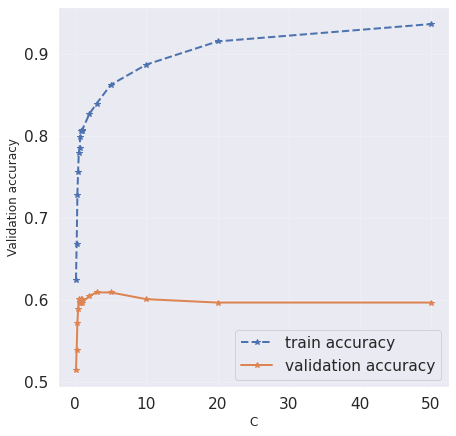

In [116]:
from google.colab import widgets
from sklearn.metrics import confusion_matrix
from sklearn import svm

# Standardization
mean = X_train.mean(0)
sd =  X_train.std(0)
X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd
C_values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,5,10,20,50]

# Initialize tabs
tb = widgets.TabBar([str(C) for C in C_values])

accuracy = dict.fromkeys(C_values)
train_accuracy = dict.fromkeys(C_values)
for C in C_values:
  with tb.output_to(str(C), select= (C < 1)):

    # Model Training
    model  = svm.SVC(kernel='rbf',C=float(C),gamma=2)
    model.fit(X_train,y_train)
    
    # Predict using the model for both training and validation data
    yt_p = model.predict(X_train)
    yv_p = model.predict(X_val)
    print('Training Accuracy', np.mean(yt_p==y_train))
    print('Validation  Accuracy', np.mean(yv_p==y_val))
    accuracy[C] = np.mean(yv_p==y_val)
    train_accuracy[C] = np.mean(yt_p==y_train)
    
    # Generating the confusion matrix    
    trainMatrix = confusion_matrix(y_true=y_train, y_pred=yt_p)
    trainMatrix_nor = trainMatrix.astype('float') / trainMatrix.sum(axis=1)[:, np.newaxis]
    valMatrix = confusion_matrix(y_true=y_val, y_pred=yv_p)
    valMatrix_nor = valMatrix.astype('float') / valMatrix.sum(axis=1)[:, np.newaxis]

    print('Confusion matrix for Training:\n {}\n'.format(trainMatrix))
    print('Confusion matrix for Validation:\n {}\n'.format(valMatrix))

    print('Normalised confusion matrix for Training:\n {}\n'.format(trainMatrix_nor))
    print('Normalised confusion matrix for Validation :\n {}\n'.format(valMatrix_nor))

# Here we predict the value of the validation accuracy as a function of C
plt.figure(figsize=(7, 7))
plt.plot(C_values , list(train_accuracy.values()),'--*',label = 'train accuracy', linewidth=2)
plt.plot(C_values, list(accuracy.values()),'-*',label = 'validation accuracy', linewidth=2)
plt.xlabel("C", fontsize=12)
plt.ylabel("Validation accuracy", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(loc="lower right")
plt.show()

Here, we can see that c=2 is the best parameter for SVM model.

#Mel-frequency cepstrum(Deep Learning model)

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.



Implementing Mel-frequency cepstrum model to check if the accuarcy of the model

In [120]:
def features_extractor(MLENDHW_df):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')   #Using librosa loading the audio samples
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [121]:
audio_dataset_path='/content/drive/MyDrive/data1/dataset/sample/set/' #Defining the audio dataset path
metadata=MLENDHW_df
metadata.head() #Data frame for the Audio dataset

,participant,interpretation,number,song
file_id,,,,
S120_whistle_2_Potter.wav,S120,whistle,2,Potter
S120_hum_2_StarWars.wav,S120,hum,2,StarWars
S120_hum_2_Potter.wav,S120,hum,2,Potter
S120_whistle_2_StarWars.wav,S120,whistle,2,StarWars
S121_hum_1_Potter.wav,S121,hum,1,Potter


Feature extraction

In [122]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path)+'/'+str(row["participant"]+"_"+str(row["interpretation"])+'_'+str(row["number"])+'_'+str(row["song"])+'.wav'))
    final_class_labels=row["song"]
    data=features_extractor('file_name')
    extracted_features.append([data,final_class_labels])

810it [03:46,  3.57it/s]


Creating a dataframe for features and song labels

In [123]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','song'])
extracted_features_df.head() #Dataframe for features and song labels

,feature,song
0,"[-337.23022, 97.29081, -45.38114, 5.3052297, 3...",Potter
1,"[-209.88509, 73.30888, -66.04616, 39.89076, -5...",StarWars
2,"[-475.24496, 76.32381, 19.634926, 11.313483, 1...",Potter
3,"[-359.3181, 91.76305, -42.496353, 11.28933, 28...",StarWars
4,"[-608.15027, 94.32814, 17.916317, 38.713867, 1...",Potter


Defining X and y

In [124]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(c['song'].tolist())

In [125]:
X.shape # Shape of X

(810, 40)

In [126]:
y

array(['Potter', 'StarWars', 'Potter', 'StarWars', 'Potter', 'Potter',
       'StarWars', 'StarWars', 'StarWars', 'Potter', 'StarWars', 'Potter',
       'StarWars', 'StarWars', 'Potter', 'StarWars', 'Potter', 'StarWars',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'Potter', 'StarWars',
       'Potter', 'StarWars', 'Potter', 'Potter', 'Potter', 'StarWars',
       'StarWars', 'Potter', 'StarWars', 'StarWars', 'StarWars', 'Potter',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'Potter', 'StarWars',
       'Potter', 'StarWars', 'Potter', 'StarWars', 'StarWars', 'Potter',
       'Potter', 'StarWars', 'Potter', 'Potter', 'StarWars', 'Potter',
       'StarWars', 'StarWars', 'StarWars', 'Potter', 'Potter', 'StarWars',
       'Potter', 'Potter', 'StarWars', 'Potter', 'StarWars', 'StarWars',
       'Potter', 'Potter', 'StarWars', 'StarWars', 'StarWars', 'StarWars',
       'StarWars', 'Potter', 'Potter', 'StarWars', 'Potter', 'StarWars',
       'StarWars', 'StarWars', 'Potter', 'Potte

In [127]:
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [128]:
from sklearn.model_selection import train_test_split # splitting the dataset into train and test sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [131]:
num_labels=y.shape[1]

In [132]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [133]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 100)              

In [134]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [135]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/data1/dataset/sample/set',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
16/21 [=====================>........] - ETA: 0s - loss: 27.2455 - accuracy: 0.5566 
Epoch 00001: val_loss improved from inf to 4.69548, saving model to /content/drive/MyDrive/data1/dataset/sample/set
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data1/dataset/sample/set/assets
21/21 [==============================] - 3s 111ms/step - loss: 26.3282 - accuracy: 0.5370 - val_loss: 4.6955 - val_accuracy: 0.4012
Epoch 2/100
11/21 [==============>...............] - ETA: 0s - loss: 19.8635 - accuracy: 0.5199
Epoch 00002: val_loss improved from 4.69548 to 0.95910, saving model to /content/drive/MyDrive/data1/dataset/sample/set
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data1/dataset/sample/set/assets
21/21 [==============================] - 3s 126ms/step - loss: 16.6941 - accuracy: 0.5201 - val_loss: 0.9591 - val_accuracy: 0.5309
Epoch 3/100
17/21 [=======================>......] - ETA: 0s - loss: 10.2471 - accuracy: 0.5386
Epoch 00003: val_loss did not i

In [136]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]) # Test accuracy of the model

0.4753086566925049


Here we get a validation accuracy of 47 which is low compared to other models which i have implemented.

#9) CONCLUSION

We have successfully implemented GaussianNB,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier(),SVC(kernel='rbf'),AdaBoostClassifier,QuadraticDiscriminantAnalysis to predict the song label(Potter or Starwars). And I have also implemented Mel-frequency cepstrum(Deep learning model) to predict the song label and came to a conclusion that KNeighborsClassifier with a accuarcy of 65 after cross validation is the best model.